# Detection and segmentation of multiple modules

This is a quick tutorial showcasing the detection of multiple modules.

## Preparation

In [8]:
from pvinspect.data import datasets, Image, EagerImage
from pvinspect.preproc.detection import locate_multiple_modules
from pvinspect.data.io import save_image
import numpy as np

## Data

Import our favourite sequence of test images:

In [2]:
data = datasets.poly10x6(N=5)

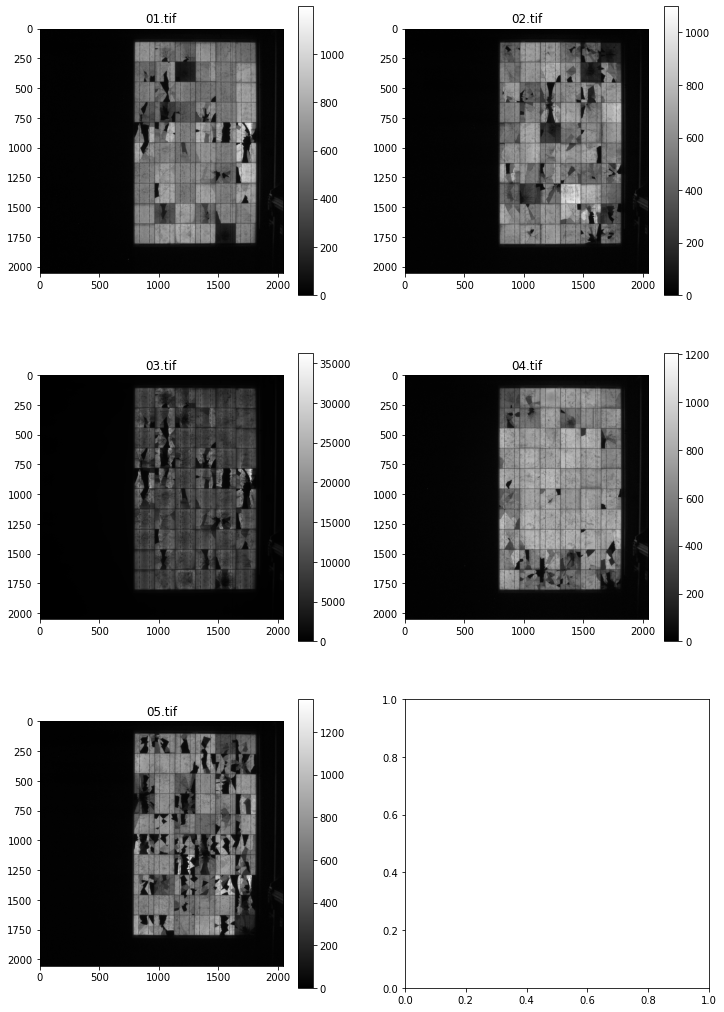

In [3]:
data.head(N=5)

Unfortunately, this sequence has only single module images. But for demonstration purposes, we can concatenate some of them to obtain an image with four modules. We skip ``data[2]``, since this one has a very different range of photon counts, which makes visualization hard.

In [12]:
data_multi = EagerImage(data=np.concatenate((
    np.concatenate((data[0].data, data[1].data), axis=1),
    np.concatenate((data[3].data, data[4].data), axis=1),
), axis=0), original_filename="fake.png")

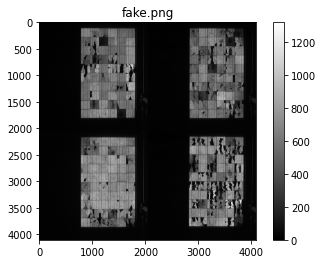

In [13]:
data_multi.show()

## Detection and segmentation

Now, we can locate the modules in our artificial multi-module image. This method has many options, but the default ones should work for most use cases:

In [14]:
modules = locate_multiple_modules(data_multi)

100%|██████████| 1/1 [00:00<00:00,  1.41it/s]


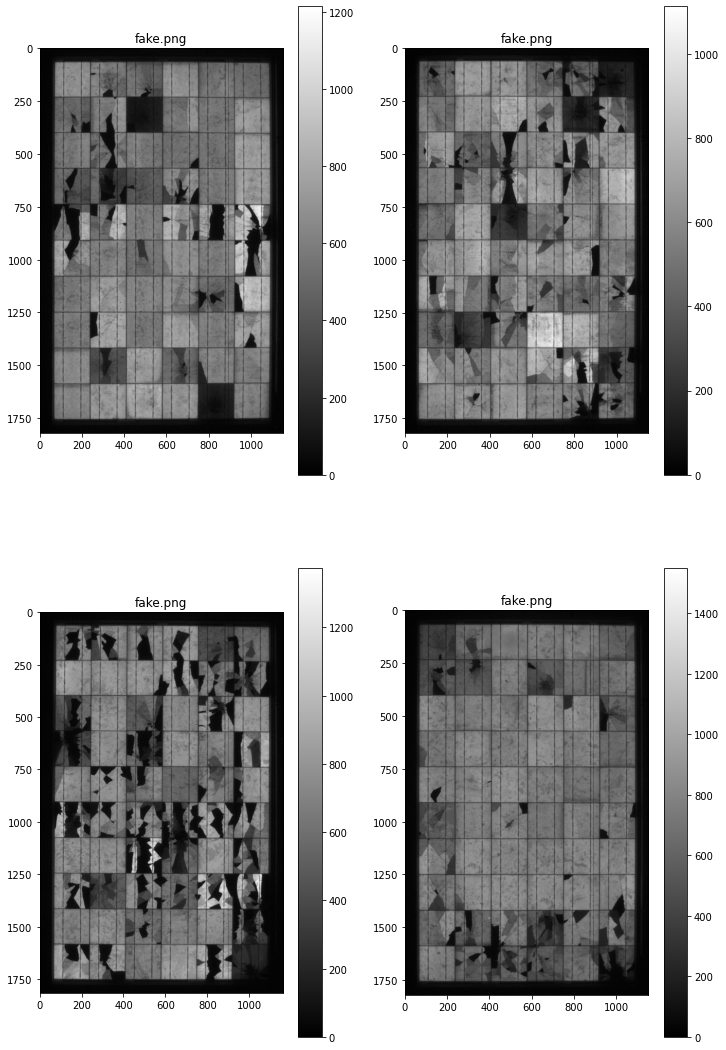

In [15]:
modules.head(N=4)

## Visualization

Most likely, we want to know, which one from the original image is ``module00``, ``module01`` and so on. Luckily, we have a meta attribute ``multimodule_original`` referring to the original image with annotations:

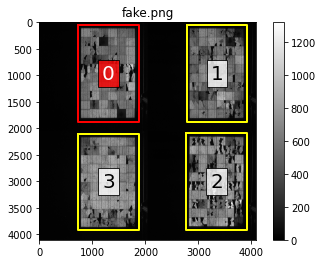

In [16]:
modules[0].get_meta('multimodule_original').show()

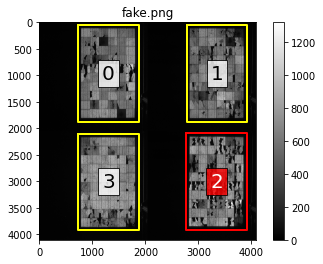

In [17]:
modules[2].get_meta('multimodule_original').show()

We can even control what is visualized:

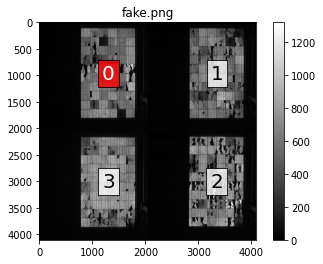

In [18]:
modules[0].get_meta('multimodule_original').show(multimodule_show_boxes=False)

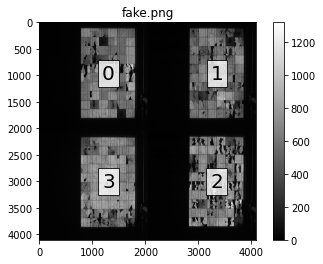

In [19]:
modules[0].get_meta('multimodule_original').show(multimodule_show_boxes=False, multimodule_highlight_selection=False)

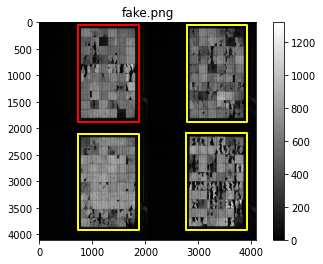

In [20]:
modules[0].get_meta('multimodule_original').show(multimodule_show_numbers=False)